# Basic optimization example with exact solution

This is a basic example of an optimization problem and how we solve it with exact methods.

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## Define the function to use
We are going to use `sympy` to calculate Jacobian and Hessian matrices. We will use the Rosenbrock function $100(x_2-x_1^2)^2+(1-x_1)^2$ as example. 

In [2]:
def func(x,y):
    return 100*(y-x**2)**2+(1-x)**2
x1,x2=symbols("x1 x2")
f=Matrix([100*(x2-x1**2)**2+(1-x1)**2])
X=Matrix([x1,x2])
f

Matrix([[(1 - x1)**2 + 100*(-x1**2 + x2)**2]])

The gradient is given by:

In [3]:
f.jacobian(X)

Matrix([[-400*x1*(-x1**2 + x2) + 2*x1 - 2, -200*x1**2 + 200*x2]])

The first order conditions are derived by solving for the gradient equal to zero. The point (1,1) is a *stationary point*.

In [4]:
x_star=solve(f.jacobian(X))
x_star

[{x1: 1, x2: 1}]

The Hessian is given by

In [5]:
H=hessian(f,X)
H

Matrix([
[1200*x1**2 - 400*x2 + 2, -400*x1],
[                -400*x1,     200]])

and the second order necessary conditions state that the Hessian for the stationary point has to be positive definite

In [6]:
H_star=H.evalf(subs={x1:1,x2:1})
H_star

Matrix([
[ 802.0, -400.0],
[-400.0,  200.0]])

In [7]:
H_star.is_positive_definite

True

Since the Hessian `H_star` at `x_star` is positive definite `x_star` is a strict local minimizer of the function `f`. Here is a contour plot of the function where the red point is the minimum `x_star`.

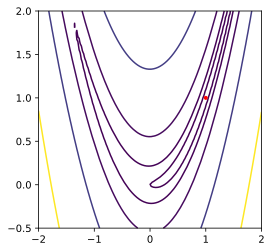

In [8]:
grid_samples=100
domain = [(-2, 2), (-0.5, 2)] 
x = np.linspace(domain[0][0], domain[0][1], grid_samples)
y = np.linspace(domain[1][0], domain[1][1], grid_samples)
    
X, Y = np.meshgrid(x, y)  
fn_vectorized = np.vectorize(func)
Z = fn_vectorized(X, Y)
    
fig,ax = plt.subplots(figsize=(4,4))
levels = np.logspace(0, 3,5)
ax.contour(X, Y, Z,levels) #[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
ax.plot([1],[1],'ro',markersize=3)
plt.close()
fig

